<a href="https://colab.research.google.com/github/Ash100/CADD_Project/blob/main/calculate_off_target_binding_of_drugs_part_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Binding site similarity and off-target prediction

My name is **Dr. Ashfaq Ahmad** and you can watch complete tutorial of this notebook on [**Bioinformatics Insights**](https://www.youtube.com/channel/UC2Z_WaqTjbvXGGQNpIF9nAg). This talktorial is inspired from TeachOpenCADD, a platform that aims to teach domain-specific skills and to provide pipeline templates as starting points for research projects. Majority of scripts are modified or changed accordingly.

Authors:

- Angelika Szengel, CADD seminar 2017, Charité/FU Berlin
- Marvis Sydow, CADD seminar 2018, Charité/FU Berlin
- Richard Gowers, RDKit UGM hackathon 2019
- Jaime Rodríguez-Guerra, 2020, [Volkamer lab](https://volkamerlab.org), Charité
- Dominique Sydow, 2018-2020, [Volkamer lab](https://volkamerlab.org), Charité
- Mareike Leja, 2020, [Volkamer lab](https://volkamerlab.org), Charité

## Aim of this talktorial

In this talktorial, we use the structural similarity of full proteins and binding sites to predict off-targets, i.e. proteins that are not intended targets of a drug. This may lead to unwanted side effects or enable desired alternate applications of a drug (drug repositioning).
We discuss the main steps for binding site comparison and implement a basic method, i.e. the geometrical variation between structures (the root mean square deviation between two structures).

### *Theory*

* Off-target proteins
* Computational off-target prediction: binding site comparison
* Pairwise RMSD as simple measure for similarity
* Imatinib, a tyrosine kinase inhibitor

### References

* Binding site superposition + comparison
  * Binding site comparison reviews:
    * [<i>Curr. Comput. Aided Drug Des. </i> (2008), <b>4</b>, 209-20](https://www.eurekaselect.com/67606/article/how-measure-similarity-between-protein-ligand-binding-sites)
    * [<i>J. Med. Chem. </i> (2016), <b>9</b>, 4121-51](https://pubs.acs.org/doi/10.1021/acs.jmedchem.6b00078)
  * Molecular superposition with Python: `opencadd` package (`structure.superposition` module) ([GitHub repository](https://github.com/volkamerlab/opencadd))
  * Wikipedia article on root mean square deviation ([RMSD](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions)) and [structural superposition](https://en.wikipedia.org/wiki/Structural_alignment)
  * Structural superposition: [Book chapter: Algorithms, Applications, and Challenges of Protein Structure Alignment in *Advances in Protein Chemistry and Structural Biology* (2014), **94**, 121-75](https://www.sciencedirect.com/science/article/pii/B9780128001684000056?via%3Dihub)
* Imatinib  
  * Review on Imatinib: [<i>Nat. Rev. Clin. Oncol.</i> (2016), <b>13</b>, 431-46](https://www.nature.com/articles/nrclinonc.2016.41)
  * Promiscuity of imatinib:
[<i>J. Biol.</i> (2009), <b>8</b>, 30](https://jbiol.biomedcentral.com/articles/10.1186/jbiol134)
  * [ChEMBL information on Imatinib](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL941)
  * [PDB information on Imatinib](https://www3.rcsb.org/ligand/STI)
  * Side effects of Imatinib
    * [MedFacts Consumer Drug Information](https://www.drugs.com/cdi/imatinib.html)
    * [DrugBank](https://go.drugbank.com/drugs/DB00619)
    * [<i>BMC Struct. Biol.</i> (2009), <b>9</b>](https://bmcstructbiol.biomedcentral.com/articles/10.1186/1472-6807-9-7)
* PDB queries
  * `pypdb` Python package
[_Bioinformatics_ (2016), **1**, 159-60](https://academic.oup.com/bioinformatics/article-lookup/doi/10.1093/bioinformatics/btv543); [documentation](http://www.wgilpin.com/pypdb_docs/html/)
  * `biotite` Python package [_BMC Bioinformatics_ (2018), **19**](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2367-z); [documentation](https://www.biotite-python.org/)
  

## Theory

### Off-target proteins

An off-target can be any protein which interacts with a drug or (one of) its metabolite(s) without being the designated target protein.
The molecular reaction caused by the off-target can lead to unwanted side effects, ranging from a rather harmless to an extremely harmful impact.
Off-targets mainly occur because on- and off-targets share similar structural motifs with each other in their binding site and therefore can bind similar ligands.

### Computational off-target prediction: binding site comparison

Computation-aided prediction of potential off-targets is aimed at minimizing the risk of developing potentially dangerous substances for medical treatment.
There are several algorithmic approaches to assess binding site similarity but they always consist of three main steps:

1. **Binding site encoding**: binding sites are encoded using different descriptor techniques and stored in a target database.
2. **Binding site comparison**: a query binding site is compared with the target database, using different similarity measures.
3. **Target ranking**: targets are ranked based on a suitable scoring approach.

For detailed information on different similarity measures and existing tools, we refer to two excellent reviews on binding site comparison ([<i>Curr. Comput. Aided Drug Des. </i> (2008), <b>4</b>, 209-20](https://www.eurekaselect.com/67606/article/how-measure-similarity-between-protein-ligand-binding-sites) and [<i>J. Med. Chem. </i> (2016), <b>9</b>, 4121-51](https://pubs.acs.org/doi/10.1021/acs.jmedchem.6b00078)).

![Binding site comparison steps](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T010_binding_site_comparison/images/binding_site_comparison_steps.png?raw=1)

_Figure 1_: Main steps of binding site comparison methods (figure by Dominique Sydow).</div>

### Imatinib, a tyrosine kinase inhibitor

Kinases transfer a phosphate group from ATP to proteins, and thereby regulate various cellular processes such as signal transduction, metabolism, and protein regulation.
If these kinases are constitutively active (due to genomic mutations), they can distort regulation processes and cause cancer.
An example for cancer treatment is Imatinib ([<i>Nat. Rev. Clin. Oncol.</i> (2016), <b>13</b>, 431-46](https://www.nature.com/articles/nrclinonc.2016.41)), a small molecule tyrosine kinase inhibitor used to treat cancer, more specifically chronic myeloid leukaemia (CML) and gastrointestinal stromal tumour (GIST).

Imatinib was shown to be not entirely specific and to target tyrosine kinases other than its main target. This was used for drug repositioning, i.e. Imatinib was approved for alternate cancer types, ([<i>J. Biol.</i> (2009), <b>8</b>, 30](https://jbiol.biomedcentral.com/articles/10.1186/jbiol134)), however can also show unwanted side effects such as signs of an allergic reaction, infection, bleeding, or headache ([MedFacts Consumer Drug Information](https://www.drugs.com/cdi/imatinib.html)).

## Practical

In the following, we will fetch and filter PDB structures that bind Imatinib. We will investigate the structure similarity of Imatinib-binding proteins (those with a solved protein structure).
The similarity measure used is a pairwise RMSD calculation (as a simple similarity measure), in order to show that this simple method can be used as an initial test for potential off-targets.

In [ ]:
#Install Conda - Kernal Restart will take place
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# Install mamba
!conda install -c conda-forge mamba -y

!mamba install -q -y -c conda-forge pandas matplotlib seaborn redo biotite rdkit mdanalysis
!pip install pypdb

In [ ]:
!pip install git+https://github.com/volkamerlab/opencadd.git

  Cloning https://github.com/volkamerlab/opencadd.git to /tmp/pip-req-build-yy0rj295
  Running command git clone --filter=blob:none --quiet https://github.com/volkamerlab/opencadd.git /tmp/pip-req-build-yy0rj295
  Resolved https://github.com/volkamerlab/opencadd.git to commit c76e87c4fdcb822dfc025e6cb87c34c9e17505d2
  Preparing metadata (setup.py) ... done
  Created wheel for opencadd: filename=opencadd-1.0.1+87.gc76e87c-py3-none-any.whl size=2726398 sha256=29af26845ed5eabf26614ecdff4cc415bfdd48321f0e8a8a9a9c9ad39c0523f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-0m2eabb7/wheels/d7/79/8b/ad3252f22e7f550df32d4d11248f4b0a84a1f1eee39087914d
Successfully built opencadd


In [ ]:
!pip install nglview==3.0.8
!pip install "ipywidgets>=7,<8"

In [ ]:
!jupyter-nbextension enable nglview --py --sys-prefix

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import logging
from pathlib import Path
import random
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import redo
import nglview as nv
import pypdb
import biotite.database.rcsb as rcsb
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from MDAnalysis.analysis import rms
from opencadd.structure.core import Structure
from opencadd.structure.superposition.api import align, METHODS
from opencadd.structure.superposition.engines.mda import MDAnalysisAligner

In [ ]:
# Ignore warnings, added because of the two following warnings
# VisibleDeprecationWarning (MDAnalysis), ClusterWarning (seaborn)
# TODO check in the future if ignoring warnings is still necessary
warnings.simplefilter("ignore")
# Also make MDAnalysis code in OpenCADD a bit less noisy
logger = logging.getLogger("opencadd")
logger.setLevel(logging.ERROR)

### Load and visualize the ligand of interest (Imatinib/STI)

The SMILES format for Imatinib can be retrieved from e.g. the [ChEMBL database by its compound ID *CHEMBL941*](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL941) or the [PDB database by its Ligand Expo ID *STI*](https://www3.rcsb.org/ligand/STI).
We simply copy the string from the "Isomeric SMILES" entry of the Chemical Component Summary table, and load the ligand here by hand.

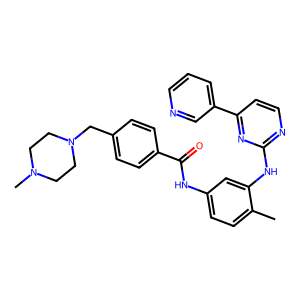

In [ ]:
smiles = Chem.MolFromSmiles("CN1CCN(Cc2ccc(cc2)C(=O)Nc2ccc(C)c(Nc3nccc(n3)-c3cccnc3)c2)CC1")
Draw.MolToImage(smiles)

In order to inspect the 3D structure of STI, we use the open source tool `nglview`.
Before we can view STI in `nglview`, we need to compute its 3D coordinates.

First, we add hydrogen atoms to the molecule, which are not always explicitly denoted in the SMILES format.
Second, we use the distance geometry to obtain initial coordinates for the molecule and optimize the structure of the molecule using the force field UFF (Universal Force Field).

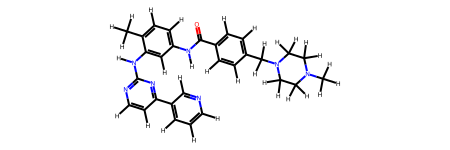

In [ ]:
molecule = Chem.AddHs(smiles)
molecule

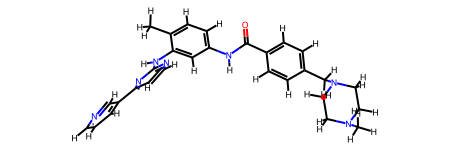

In [ ]:
AllChem.EmbedMolecule(molecule)
AllChem.UFFOptimizeMolecule(molecule)
molecule

Now, we are ready to roll in `nglview`!

In [ ]:
view = nv.show_rdkit(molecule)
view

NGLWidget()

In [ ]:
view.render_image(trim=True, factor=2, transparent=True);

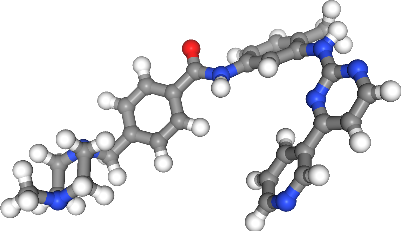

In [ ]:
view._display_image()

### Get protein-STI complexes from the PDB

In the following, we will search for PDB IDs describing structures in the PDB that fulfill the following criteria:

- Structure is bound to Imatinib (Ligand Expo ID: STI)
- Structure was experimentally resolved by X-ray crystallography
- Structure has a resolution less or equal to $3.0$
- Structure has only one chain (for simplicity)

Each structure in the PDB database is linked to many different fields to hold meta information such as our defined criteria. Check out the complete list of available fields for [chemicals](https://search.rcsb.org/chemical-search-attributes.html)/[structures](https://search.rcsb.org/structure-search-attributes.html) and supported operators on the RCSB website.

The package `biotite` provides a very nice module `databases.rcsb` (see [docs](https://www.biotite-python.org/apidoc/biotite.database.rcsb.html)), which allows us to query one (`FieldQuery`, see [docs](https://www.biotite-python.org/apidoc/biotite.database.rcsb.FieldQuery.html#biotite.database.rcsb.FieldQuery)) or more (`CompositeQuery`, see [docs](https://www.biotite-python.org/apidoc/biotite.database.rcsb.CompositeQuery.html#biotite.database.rcsb.CompositeQuery)) of these fields to retrieve a count (`count`) or list (`search`) of PDB IDs that match our criteria.

This is a table summarizing our queries:

| Field | Operator | Value |
|-|-|-|
| `rcsb_nonpolymer_entity_container_identifiers.nonpolymer_comp_id` | `exact_match` | STI |
| `exptl.method` | `exact_match` | X-RAY DIFFRACTION |
| `rcsb_entry_info.resolution_combined` | `less_or_equal` | $3.0$ |
| `rcsb_entry_info.deposited_polymer_entity_instance_count` | `equals` | $1$ |

We will first perform each of the queries alone and check the number of matches per condition. Afterwards, we will combine all queries with the `and` operator to match only PDB IDs that fulfill all the conditions.

**Query STI-bound structures**

In [ ]:
query_by_ligand_id = rcsb.FieldQuery(
    "rcsb_nonpolymer_entity_container_identifiers.nonpolymer_comp_id", exact_match="STI"
)
print(f"Number of matches: {rcsb.count(query_by_ligand_id)}")

Number of matches: 28


**Query structures from X-ray crystallography**

In [ ]:
query_by_experimental_method = rcsb.FieldQuery("exptl.method", exact_match="X-RAY DIFFRACTION")
print(f"Number of matches: {rcsb.count(query_by_experimental_method)}")

Number of matches: 185319


**Query structures with resolution less than or equal to 3.0**

In [ ]:
query_by_resolution = rcsb.FieldQuery("rcsb_entry_info.resolution_combined", less_or_equal=3.0)
print(f"Number of matches: {rcsb.count(query_by_resolution)}")

Number of matches: 179048


**Query structures with only one chain**

In [ ]:
query_by_polymer_count = rcsb.FieldQuery(
    "rcsb_entry_info.deposited_polymer_entity_instance_count", equals=1
)
print(f"Number of matches: {rcsb.count(query_by_polymer_count)}")

Number of matches: 78552


**Query structures fulfilling all the above criteria**

Use the `and` operator to combine the list of queries above.

In [ ]:
query = rcsb.CompositeQuery(
    [
        query_by_ligand_id,
        query_by_experimental_method,
        query_by_resolution,
        query_by_polymer_count,
    ],
    "and",
)
pdb_ids = rcsb.search(query)
print(f"Number of matches: {len(pdb_ids)}")
print("Selected PDB IDs:")
print(*pdb_ids)

Number of matches: 9
Selected PDB IDs:
1T46 1XBB 2PL0 3FW1 3GVU 3HEC 4CSV 4R7I 6JOL


### Align the PDB structures (full protein)

Here we are going to download all those strctures from PDB which contains STI as inhibitor or ligand.

In [ ]:
import os
import urllib.request

# List of PDB IDs
pdb_ids = ["1T46", "1XBB", "2PL0", "3FW1", "3GVU", "3HEC", "4CSV", "4R7I", "6JOL"]  # Replace with your actual PDB IDs

# Directory to save PDB files
output_dir = "/content"
os.makedirs(output_dir, exist_ok=True)

# Download PDB files
for pdb_id in pdb_ids:
    pdb_url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    try:
        output_path = os.path.join(output_dir, f"{pdb_id}.pdb")
        urllib.request.urlretrieve(pdb_url, output_path)
        print(f"Downloaded {pdb_id}.pdb")
    except Exception as e:
        print(f"Error downloading {pdb_id}: {e}")

Downloaded 1T46.pdb
Downloaded 1XBB.pdb
Downloaded 2PL0.pdb
Downloaded 3FW1.pdb
Downloaded 3GVU.pdb
Downloaded 3HEC.pdb
Downloaded 4CSV.pdb
Downloaded 4R7I.pdb
Downloaded 6JOL.pdb


Below is the Alignment Script. Please change PDB ids according to your own

In [ ]:
# Import necessary libraries
import nglview as nv
from io import StringIO
from Bio.PDB import PDBParser, PDBIO, Superimposer

# Parse the PDB files
parser = PDBParser()
struct_1T46 = parser.get_structure("1T46", "/content/1T46.pdb")
struct_1XBB = parser.get_structure("1XBB", "/content/1XBB.pdb")
struct_2PL0 = parser.get_structure("2PL0", "/content/2PL0.pdb")
struct_3FW1 = parser.get_structure("3FW1", "/content/3FW1.pdb")
struct_3GVU = parser.get_structure("3GVU", "/content/3GVU.pdb")
struct_3HEC = parser.get_structure("3HEC", "/content/3HEC.pdb")
struct_4CSV = parser.get_structure("4CSV", "/content/4CSV.pdb")
struct_4R7I = parser.get_structure("4R7I", "/content/4R7I.pdb")
struct_6JOL = parser.get_structure("6JOL", "/content/6JOL.pdb")

# Create a Superimposer object
sup = Superimposer()

# Define the fixed and moving atoms
fixed_atoms = list(struct_1T46.get_atoms())
moving_atoms = [list(struct_1XBB.get_atoms()), list(struct_2PL0.get_atoms()), list(struct_3FW1.get_atoms()), list(struct_3GVU.get_atoms()), list(struct_3HEC.get_atoms()), list(struct_4CSV.get_atoms()), list(struct_4R7I.get_atoms()), list(struct_6JOL.get_atoms())]

# Ensure the lists have the same size
min_size = min(len(fixed_atoms), min(len(atoms) for atoms in moving_atoms))
fixed_atoms = fixed_atoms[:min_size]
moving_atoms = [atoms[:min_size] for atoms in moving_atoms]

# Perform the alignment
for atoms in moving_atoms:
    sup.set_atoms(fixed_atoms, atoms)
    sup.apply(atoms)

# Function to convert a Biopython structure to a PDB string
def structure_to_pdb_string(structure):
    pdb_io = PDBIO()
    pdb_io.set_structure(structure)
    string_io = StringIO()
    pdb_io.save(string_io)
    pdb_string = string_io.getvalue()
    return pdb_string

# Convert aligned structures to PDB strings
fixed_pdb_string = structure_to_pdb_string(struct_1T46)
moving_pdb_strings = [structure_to_pdb_string(struct) for struct in [struct_1XBB, struct_2PL0, struct_3FW1, struct_3GVU, struct_3HEC, struct_4CSV, struct_4R7I]]

# Create file-like objects from PDB strings
fixed_file_obj = StringIO(fixed_pdb_string)
moving_file_objs = [StringIO(pdb_str) for pdb_str in moving_pdb_strings]



The structural alignment for many helices is high, whereas lower or poor for other protein parts.

In [ ]:
def calc_rmsd_matrix(structures, names):
    """ Calculate RMSD matrix between a list of structures.
    Parameters
    ----------
    structures : list of Bio.PDB.Structure
        List of structures.
    names : list of str
        List of structure names.
    Returns
    -------
    pandas.DataFrame
        RMSD matrix.
    """
    values = {name: {} for name in names}
    for i, (A, name_i) in enumerate(zip(structures, names)):
        for j, (B, name_j) in enumerate(zip(structures, names)):
            if i == j:
                values[name_i][name_j] = 0.0
                continue
            if i < j:
                sup = Superimposer()
                atoms_A = list(A.get_atoms())
                atoms_B = list(B.get_atoms())
                min_size = min(len(atoms_A), len(atoms_B))
                atoms_A = atoms_A[:min_size]
                atoms_B = atoms_B[:min_size]
                sup.set_atoms(atoms_A, atoms_B)
                rmsd = sup.rms
                values[name_i][name_j] = rmsd
                values[name_j][name_i] = rmsd
    df = pd.DataFrame.from_dict(values)
    return df

# Define the list of structures and names
structures = [struct_1T46, struct_1XBB, struct_2PL0, struct_3FW1, struct_3GVU, struct_3HEC, struct_4CSV, struct_4R7I, struct_6JOL]
names = ["1T46", "1XBB", "2PL0", "3FW1", "3GVU", "3HEC", "4CSV", "4R7I", "6JOL"]

# Calculate the RMSD matrix
rmsd_matrix = calc_rmsd_matrix(structures, names)

### Get RMSD Heatmap

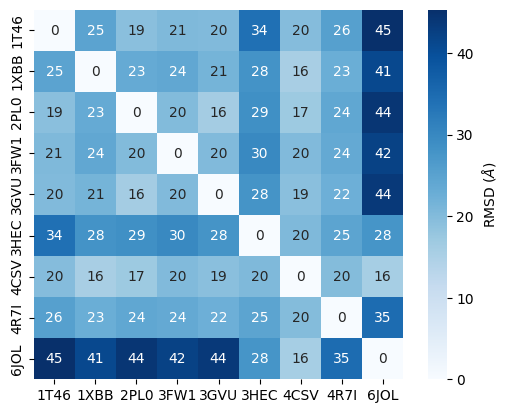

In [ ]:
# Make sure matplotlib version >= 3.1.2; otherwise you'll get Y-cropped heatmaps
sns.heatmap(
    rmsd_matrix,
    linewidths=0,
    annot=True,
    square=True,
    cbar_kws={"label": "RMSD ($\AA$)"},
    cmap="Blues",
);

We visualize the results of this RMSD refinement as heatmap.

We cluster the heatmap in order to see protein similarity based on the RMSD refinement.

In [ ]:
def plot_clustermap(rmsd):
    """
    Plot clustered heatmap from import RMSD matrix.

    Parameters
    ----------
    rmsd : pandas.DataFrame
        RMSD matrix.
    title : str
        Plot title.

    Returns
    -------
    matplotlib.figure.Figure
        Clustered heatmap.
    """
    g = sns.clustermap(
        rmsd,
        linewidths=1,
        annot=True,
        cbar_kws={"label": "RMSD ($\AA$)"},
        cmap="Blues",
    )
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
    sns.set(font_scale=1.5)
    return plt.gcf()

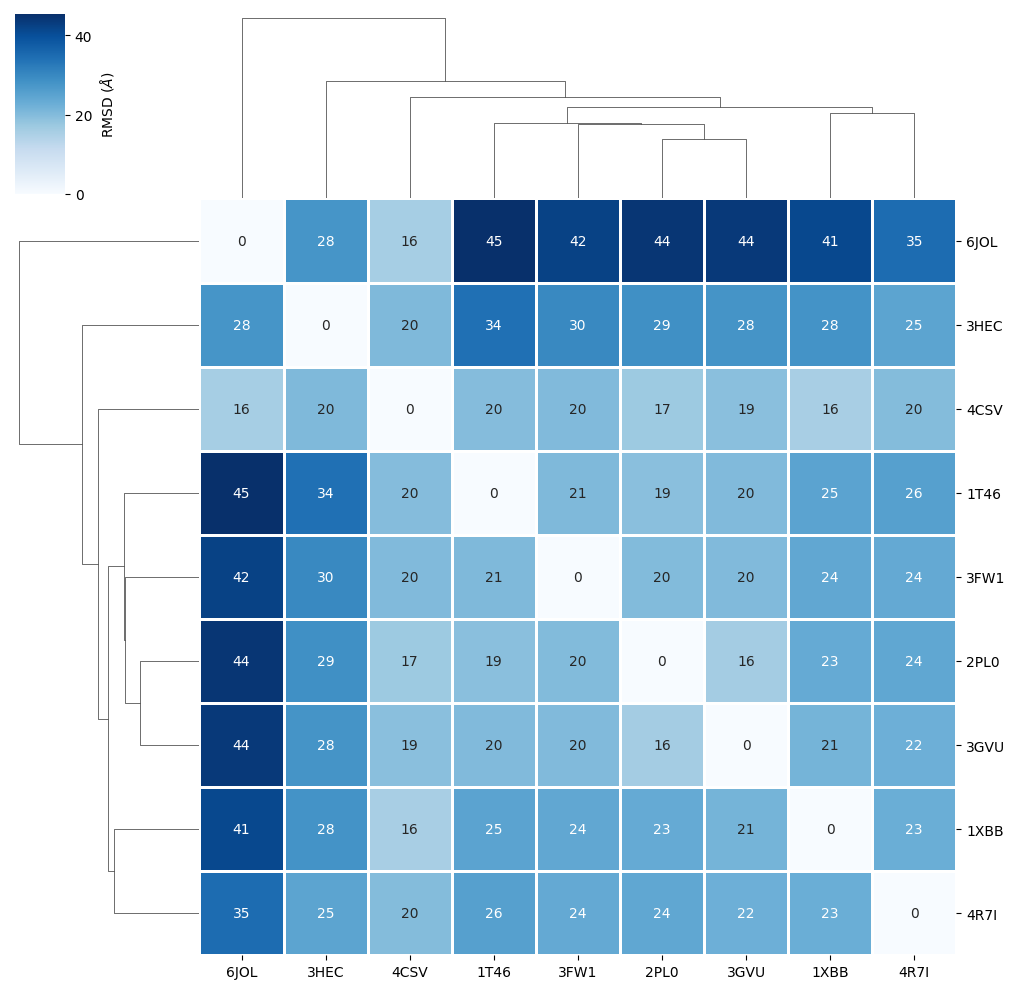

In [ ]:
plot_clustermap(rmsd_matrix);

The RMSD comparison shows that one protein differs most from the other proteins, i.e. 3FW1. Let's try to understand by checking which proteins we have in our dataset.

Proteins are classified by the chemical reactions that they catalyze with EC (Enzyme Commission) numbers. We will use them here to check the enzymatic groups the proteins belong to. Let's get the EC numbers from the PDB using the package `pypdb`.

In [ ]:
import pypdb

# Get EC numbers for PDB IDs from PDB
pdb_ids = ["1T46", "1XBB", "2PL0", "3FW1", "3GVU", "3HEC", "4CSV", "4R7I", "6JOL"]
pdbs_info = [pypdb.get_all_info(pdb_id) for pdb_id in pdb_ids]
struct_titles = []
for pdb_info in pdbs_info:
    if "struct" in pdb_info and "title" in pdb_info["struct"]:
        struct_titles.append(pdb_info["struct"]["title"])
    else:
        struct_titles.append("")

ec_numbers = pd.DataFrame(
    {
        "pdb_id": pdb_ids,
        "description": struct_titles,
    }
)

# Increase column width to fit all text
pd.set_option("max_colwidth", 100)
print(ec_numbers)

  pdb_id  \
0   1T46   
1   1XBB   
2   2PL0   
3   3FW1   
4   3GVU   
5   3HEC   
6   4CSV   
7   4R7I   
8   6JOL   

                                                                               description  
0  STRUCTURAL BASIS FOR THE AUTOINHIBITION AND STI-571 INHIBITION OF C-KIT TYROSINE KINASE  
1                         Crystal structure of the syk tyrosine kinase domain with Gleevec  
2                                                                    LCK bound to imatinib  
3                                                                      Quinone Reductase 2  
4                              The crystal structure of human ABL2 in complex with GLEEVEC  
5                                                             P38 in complex with Imatinib  
6                   Tyrosine kinase AS - a common ancestor of Src and Abl bound to Gleevec  
7         Crystal structure of FMS kinase domain with a small molecular inhibitor, GLEEVEC  
8               Crystal structure of PDGFR

We can see that 3FW1 is a the human quinone reductase 2 (NQO2), the only protein not belonging to class 2.7 (phosphorus transferases), which contains the tyrosine kinases (EC 2.7.10.2), the designated targets for Imatinib. 3FW1 is a reported off-target "with potential implications for drug design and treatment of chronic myelogenous leukemia in patients" ([<i>BMC Struct. Biol.</i> (2009), <b>9</b>](https://bmcstructbiol.biomedcentral.com/articles/10.1186/1472-6807-9-7)).

### Align PDB structures (binding sites)

So far, we have used the full protein structure for the alignment and RMSD refinement. However, ligands bind only at a protein's binding site.
Therefore, the similarity of binding sites is a more putative basis for off-target prediction rather than of the similarity of full protein structures.

We define a binding site of a protein by selecting all residues that are within 10 &#8491; of any ligand atom. These binding site residues are used for alignment and only their C&#593; atoms (protein backbone) are used for the RMSD refinement. Here, we show the alignment of all structures to the first structure in our list.

Note that for the aligner to work, full residues must be selected as part of the distance search, hence the need for the `same residue as (...)` query.

In [ ]:
binding_sites = []
for s in structures:
    bs = []
    for atom in s.get_atoms():
        residue = atom.get_parent()
        chain = residue.get_parent()
        for other_residue in chain.get_list():
            if other_residue != residue and other_residue.get_resname() == 'STI':
                bs.append(atom)
                break
    binding_sites.append(bs)

In [ ]:
import nglview as nv
from io import StringIO
from Bio.PDB import PDBParser, PDBIO, Superimposer, NeighborSearch, Select
import numpy as np

# Function to select binding site residues
class BindingSiteSelect(Select):
    def __init__(self, binding_site_residues):
        self.binding_site_residues = binding_site_residues

    def accept_residue(self, residue):
        return residue in self.binding_site_residues

# Parse the PDB files
parser = PDBParser()
structure_files = [
    "/content/1T46.pdb",
    "/content/1XBB.pdb",
    "/content/2PL0.pdb",
    "/content/3FW1.pdb",
    "/content/3GVU.pdb",
    "/content/3HEC.pdb",
    "/content/4CSV.pdb",
    "/content/4R7I.pdb",
    "/content/6JOL.pdb"
]

structures = [parser.get_structure(f"structure_{i}", file) for i, file in enumerate(structure_files)]

# Extract binding sites within 5 Å of STI
binding_sites = []
radius = 5.0

for s in structures:
    bs = []
    sti_atoms = [atom for atom in s.get_atoms() if atom.get_parent().get_resname() == 'STI']
    ns = NeighborSearch(list(s.get_atoms()))
    for sti_atom in sti_atoms:
        close_residues = ns.search(sti_atom.coord, radius, level='R')
        bs.extend(close_residues)
    binding_sites.append(list(set(bs)))  # Ensure unique residues

# Align binding sites
ref_binding_site = binding_sites[0]
aligned_structures = [structures[0]]

for i in range(1, len(binding_sites)):
    sup = Superimposer()
    fixed_atoms = [atom for residue in ref_binding_site for atom in residue.get_atoms()]
    moving_atoms = [atom for residue in binding_sites[i] for atom in residue.get_atoms()]

    # Ensure the lists have the same size
    min_size = min(len(fixed_atoms), len(moving_atoms))
    fixed_atoms = fixed_atoms[:min_size]
    moving_atoms = moving_atoms[:min_size]

    sup.set_atoms(fixed_atoms, moving_atoms)
    sup.apply(structures[i].get_atoms())
    aligned_structures.append(structures[i])

# Convert aligned binding sites to PDB strings
binding_site_pdb_strings = []
pdb_io = PDBIO()

for structure, binding_site in zip(aligned_structures, binding_sites):
    string_io = StringIO()
    pdb_io.set_structure(structure)
    pdb_io.save(string_io, select=BindingSiteSelect(binding_site))
    binding_site_pdb_strings.append(string_io.getvalue())

# Visualize the aligned binding sites with nglview
view = nv.NGLWidget()

for pdb_string in binding_site_pdb_strings:
    file_obj = StringIO(pdb_string)
    view.add_component(file_obj, ext="pdb")

view

NGLWidget()

In [ ]:
import numpy as np
from Bio.PDB import PDBParser, Superimposer, NeighborSearch

# Function to select binding site residues within a given radius around a ligand
def get_binding_site(structure, ligand_resname, radius):
    binding_site_atoms = []
    ligand_atoms = [atom for atom in structure.get_atoms() if atom.get_parent().get_resname() == ligand_resname]
    ns = NeighborSearch(list(structure.get_atoms()))
    for ligand_atom in ligand_atoms:
        close_atoms = ns.search(ligand_atom.coord, radius)
        for atom in close_atoms:
            if atom not in binding_site_atoms:
                binding_site_atoms.append(atom)
    return binding_site_atoms

# Function to calculate RMSD matrix
def calc_rmsd_matrix(binding_sites):
    num_structures = len(binding_sites)
    rmsd_matrix = np.zeros((num_structures, num_structures))
    for i in range(num_structures):
        for j in range(i, num_structures):
            if i == j:
                rmsd_matrix[i, j] = 0.0
            else:
                sup = Superimposer()
                fixed = binding_sites[i]
                moving = binding_sites[j]
                # Ensure that the lists of atoms have the same length
                if len(fixed) != len(moving):
                    min_length = min(len(fixed), len(moving))
                    fixed = fixed[:min_length]
                    moving = moving[:min_length]
                sup.set_atoms(fixed, moving)
                rmsd_matrix[i, j] = sup.rms
                rmsd_matrix[j, i] = sup.rms
    return rmsd_matrix

# Main script
if __name__ == "__main__":
    pdb_files = ["/content/1T46.pdb", "/content/1XBB.pdb", "/content/2PL0.pdb", "/content/3FW1.pdb", "/content/3GVU.pdb", "/content/3HEC.pdb", "/content/4CSV.pdb", "/content/4R7I.pdb", "/content/6JOL.pdb"]
    pdb_ids = ["1T46", "1XBB", "2PL0", "3FW1", "3GVU", "3HEC", "4CSV", "4R7I", "6JOL"]
    radius = 5.0
    ligand_resname = 'STI'
    parser = PDBParser()
    # Parse structures
    structures = [parser.get_structure(pdb_id, file) for pdb_id, file in zip(pdb_ids, pdb_files)]
    # Extract binding sites
    binding_sites = [get_binding_site(structure, ligand_resname, radius) for structure in structures]
    # Calculate RMSD matrix
    rmsd_matrix = calc_rmsd_matrix(binding_sites)
    print(rmsd_matrix.round(2))

[[ 0.    7.52  8.41  7.95 10.11  8.75  8.36  8.02  7.48]
 [ 7.52  0.    7.7   7.5   7.65  7.67  7.76  7.48  7.74]
 [ 8.41  7.7   0.    8.39  7.57  8.83  8.01  7.86  6.53]
 [ 7.95  7.5   8.39  0.   13.04  8.2   8.51  8.38  7.95]
 [10.11  7.65  7.57 13.04  0.    8.91  8.71  8.52  6.25]
 [ 8.75  7.67  8.83  8.2   8.91  0.    7.54  7.42  9.02]
 [ 8.36  7.76  8.01  8.51  8.71  7.54  0.    5.96  8.39]
 [ 8.02  7.48  7.86  8.38  8.52  7.42  5.96  0.    7.76]
 [ 7.48  7.74  6.53  7.95  6.25  9.02  8.39  7.76  0.  ]]


Let's look at the proteins' binding sites only.

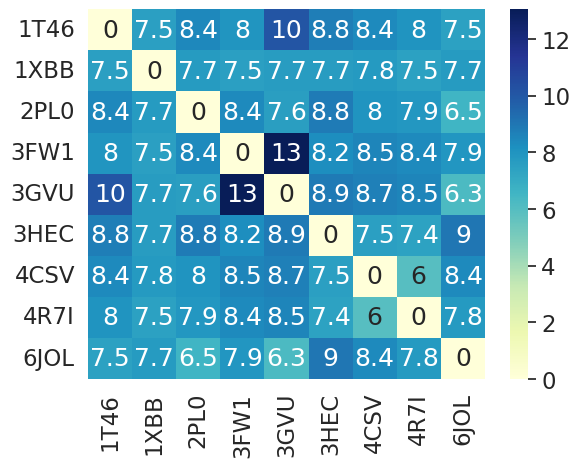

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the heatmap
sns.heatmap(rmsd_matrix, annot=True, cmap="YlGnBu", xticklabels=pdb_ids, yticklabels=pdb_ids)

# Show the plot
plt.show()

Let's Analyze the binding sites alignment

We show the clustered heatmap for the RMSD results.

What are the key observations in this heatmap?

- As observed already during the *full protein* comparison, also the *binding site* comparison reveals the highest dissimilarity for `3FW1`. Since `3FW1` is the only structure in our dataset representing not a kinase, we are content that our similarity measure was able to spot this. As discussed before, the human quinone reductase 2 (`3FW1`) is a reported off-target for Imatinib.
- Also the kinase `1XBB` shows a higher dissimilarity compared to the other kinases. This can be explained by `1XBB` being resolved in a different conformation (DFG-in) than the other kinases (DFG-out). The DFG motif is an important structural element in kinases, defining whether a kinase is active (DFG-in conformation) or inactive (DFG-out conformation). Note: DFG conformations of kinase structures can be looked up e.g. in the [KLIFS database](https://www.klifs.net).
- The remaining structures are comparatively similar to each other, which we would expect since they all represent kinases in the overall same conformation.

Note that RMSD values as calculated here are dependent on the residue selection (binding site definition) and the quality of the a priori sequence alignment.

Much better!

## Discussion

In this talktorial, we have used a simple comparison approach, i.e. sequence alignment and subsequent RMSD refinement of (i) full proteins and (ii) binding sites, to assess the similarity and dissimilarity of a small set of structures showing Imatinib-binding proteins.
In our data set, we were able to spot an off-target for Imatinib (highest dissimilarity) and a kinase resolved in a different conformation compared to the rest of the kinases (also with a relatively high dissimilarity).
Given our simple approach, we are content with these results!

In a real case scenario, off-targets for Imatinib would be predicted by comparing the binding site of an intended target of Imatinib (a tyrosine kinase) with a large database of resolved structures (PDB).
Since this results in the comparison of sequences also with low similarity, more sophisticated methods should be invoked
that use a sequence-independent alignment algorithm and that include the physico-chemical properties of the binding site.

